# Deliverable 1: Code

In [31]:
import random
import numpy as np
import matplotlib.pyplot as plt

def linearData(n_sample=400):
	theta = np.random.rand() * 2 * np.pi
	w_star = np.array([[np.cos(theta), np.sin(theta)]])
	margin = 0.1
	noise = 0.1
	#  create data
	X = 2 * np.random.rand(n_sample, 2) - 1
	label = (X @ w_star.T) > 0
	label = label.astype(float)
	# create margin
	idx = (label * (X @ w_star.T)) < margin
	X = X + margin * ((idx * label) @ w_star)
	# add noise
	noise_x = noise * (2 * np.random.rand(n_sample, 2) - 1)
	X = X + noise_x
	return X, label


def XORData(n_sample=400):
	margin = 0.1
	noise = 0.1
	# create data
	X = 2 * np.random.rand(n_sample, 2) - 1
	label = (X[:, 0] * X[:, 1]) > 0
	label = label.astype(float).reshape((-1, 1))
	# create margin
	pos_flag = X >= 0
	X = X + 0.5 * margin * pos_flag
	X = X - 0.5 * margin * (~pos_flag)
	# add noise
	noise_x = noise * (2 * np.random.rand(n_sample, 2) - 1)
	X = X + noise_x
	return X, label


def circleData(n_sample=400):
	noise = 0.05
	# create data
	X = 2 * np.random.rand(n_sample, 2) - 1
	dist = np.sqrt(X[:, 0] ** 2 + X[:, 1] ** 2)
	label = dist <= 0.5
	label = label.astype(float).reshape((-1, 1))
	# add noise
	noise_x = noise * (2 * np.random.rand(n_sample, 2) - 1)
	X = X + noise_x
	return X, label


def sinusoidData(n_sample=400):
	noise = 0.05
	# create data
	X = 2 * np.random.rand(n_sample, 2) - 1
	label = (np.sin(np.sum(X, axis=- 1) * 2 * np.pi) > 0)
	label = label.astype(float).reshape((-1, 1))
	# add noise
	noise_x = noise * (2 * np.random.rand(n_sample, 2) - 1)
	X = X + noise_x
	return X, label


def swissrollData(n_sample=400):
	noise = 0.05
	nHalf = int(n_sample / 2)
	# create data
	t = np.random.rand(nHalf, 1)
	x1 = t * np.cos(2 * np.pi * t * 2)
	y1 = t * np.sin(2 * np.pi * t * 2)
	t = np.random.rand(n_sample - nHalf, 1)
	x2 = (-t) * np.cos(2 * np.pi * t * 2)
	y2 = (-t) * np.sin(2 * np.pi * t * 2)
	xy1 = np.concatenate([x1, y1], axis=1)
	xy2 = np.concatenate([x2, y2], axis=1)
	X = np.concatenate([xy1, xy2], axis=0)
	label = np.concatenate([np.ones((nHalf, 1)), np.zeros((n_sample - nHalf, 1))], axis=0)
	# add noise
	noise_x = noise * (2 * np.random.rand(n_sample, 2) - 1)
	X = X + noise_x
	return X, label


def sample_data(data_name='circle', nTrain=200, nTest=200, random_seed=0,):
	"""
	Data generation function
	:param data_name: linear-separable, XOR, circle, sinusoid, swiss-roll
	:return:
	"""
	random.seed(random_seed)
	np.random.seed(random_seed)
	n_sample = nTrain + nTest
	if data_name == 'linear-separable':
		X, label = linearData(n_sample)
	elif data_name == 'XOR':
		X, label = XORData(n_sample)
	elif data_name == 'circle':
		X, label = circleData(n_sample)
	elif data_name == 'sinusoid':
		X, label = sinusoidData(n_sample)
	elif data_name == 'swiss-roll':
		X, label = swissrollData(n_sample)
	else:
		raise NotImplementedError


	indices = np.random.permutation(n_sample)
	train_idx, test_idx = indices[:nTrain], indices[nTrain:]
	x_train = X[train_idx]
	y_train = label[train_idx]
	x_test = X[test_idx]
	y_test = label[test_idx]
	return x_train, y_train, x_test, y_test


def plot_loss(logs):
	"""
	Function to plot training and validation/test loss curves
	:param logs: dict with keys 'train_loss','test_loss' and 'epochs', where train_loss and test_loss are lists with 
				the training and test/validation loss for each epoch
	"""
	plt.figure(figsize=(14, 6))
	plt.subplot(1, 2, 1)
	t = np.arange(len(logs['train_loss']))
	plt.plot(t, logs['train_loss'], label='train_loss', lw=3)
	plt.plot(t, logs['test_loss'], label='test_loss', lw=3)
	plt.grid(1)
	plt.xlabel('epochs',fontsize=15)
	plt.ylabel('loss value',fontsize=15)
	plt.title('Loss curves',fontsize=15)
	plt.legend(fontsize=15)

def plot_decision_boundary(X, y, pred_fn, boundary_level=None):
	"""
	Plots the decision boundary for the model prediction
	:param X: input data
	:param y: true labels
	:param pred_fn: prediction function, which uses the current model to predict. i.e., y_pred = pred_fn(X)
	:param boundary_level: Determines the number and positions of the contour lines / regions.
	:return: None
	"""

	x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
	y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
	xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

	Z = pred_fn(np.c_[xx.ravel(), yy.ravel()])
	Z = Z.reshape(xx.shape)
	plt.figure()
	plt.contourf(xx, yy, Z, alpha=0.7, levels=boundary_level, cmap='viridis_r')
	plt.xlim(xx.min(), xx.max())
	plt.ylim(yy.min(), yy.max())
	plt.title('Decision boundary',fontsize=15)
	plt.scatter(X[:, 0], X[:, 1], c=y.reshape(-1), alpha=0.7, s=50, cmap='viridis_r')


In [32]:
class MLP:
    def __init__(self, num_layers, num_width, opt_act, opt_init, update_method='gd', beta=0.9, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.num_layers = num_layers
        self.params = self.init_params(num_layers, num_width, opt_init)
        self.activation_funcs = opt_act
        self.update_method = update_method
        self.patience = 25

        # params for GD with momentum
        # create dictionary for W and b with the same shape as params
        self.vdW = {key: np.zeros_like(value) for key, value in self.params.items() if 'W' in key}
        self.vdb = {key: np.zeros_like(value) for key, value in self.params.items() if 'b' in key}
        self.beta = beta

        # params for Adam
        self.mW = {key: np.zeros_like(value) for key, value in self.params.items() if 'W' in key}
        self.mb = {key: np.zeros_like(value) for key, value in self.params.items() if 'b' in key}
        self.vW = {key: np.zeros_like(value) for key, value in self.params.items() if 'W' in key}
        self.vb = {key: np.zeros_like(value) for key, value in self.params.items() if 'b' in key}
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.t = 1 # current epoch

    def init_params(self, num_layers, num_width, opt_init):
        params = {}
        for i in range(1, num_layers):
            n_in = num_width[i - 1]
            n_out = num_width[i]

            if (opt_init == 'xavier'):
                deviation = np.sqrt(2. / (n_in + n_out))
            elif (opt_init == 'he'):
                deviation = np.sqrt(2. / n_in)   # uisng the default fan_mode
            else:
                raise ValueError("Invalid initialization method")

            params['W' + str(i)] = np.random.randn(n_out, n_in) * deviation
            params['b' + str(i)] = np.zeros((num_width[i], 1))
        return params
    
    def update_mlp(self, params, gradients, learning_rate):
        if self.update_method == 'gd':
            # assuming exactly half the number of params are weights
            for l in range(1, len(params) // 2):
                params['W' + str(l)] -= learning_rate * gradients['dW' + str(l)]
                params['b' + str(l)] -= learning_rate * gradients['db' + str(l)]

        elif self.update_method == 'momentum':
            for l in range(1, self.num_layers):
                self.vdW[f'W{l}'] = self.beta * self.vdW[f'W{l}'] + (1 - self.beta) * gradients[f'dW{l}']
                self.vdb[f'b{l}'] = self.beta * self.vdb[f'b{l}'] + (1 - self.beta) * gradients[f'db{l}']

                self.params[f'W{l}'] -= learning_rate * self.vdW[f'W{l}']
                self.params[f'b{l}'] -= learning_rate * self.vdb[f'b{l}']
        
        elif self.update_method == 'adam':
            for l in range(1, self.num_layers):
                self.mW[f'W{l}'] = self.beta1 * self.mW[f'W{l}'] + (1 - self.beta1) * gradients[f'dW{l}']
                self.mb[f'b{l}'] = self.beta1 * self.mb[f'b{l}'] + (1 - self.beta1) * gradients[f'db{l}']
                self.vW[f'W{l}'] = self.beta2 * self.vW[f'W{l}'] + (1 - self.beta2) * np.square(gradients[f'dW{l}'])
                self.vb[f'b{l}'] = self.beta2 * self.vb[f'b{l}'] + (1 - self.beta2) * np.square(gradients[f'db{l}'])

                mW_corrected = self.mW[f'W{l}'] / (1 - self.beta1 ** self.t)
                mb_corrected = self.mb[f'b{l}'] / (1 - self.beta1 ** self.t)
                vW_corrected = self.vW[f'W{l}'] / (1 - self.beta2 ** self.t)
                vb_corrected = self.vb[f'b{l}'] / (1 - self.beta2 ** self.t)

                self.params[f'W{l}'] -= learning_rate * mW_corrected / (np.sqrt(vW_corrected) + self.epsilon)
                self.params[f'b{l}'] -= learning_rate * mb_corrected / (np.sqrt(vb_corrected) + self.epsilon)
        
        return params  # this variable is only updated for the gd method

def relu(U):
    return np.maximum(0, U)

def relu_derivative(U):
    return U > 0

def sigmoid(U):
    return 1 / (1 + np.exp(-U))

def sigmoid_derivative(U):
    s = sigmoid(U)
    return s * (1 - s)

def tanh(U):
    return np.tanh(U)

def tanh_derivative(U):
    return 1 - np.tanh(U)**2

def linear(U):
    return U

def linear_derivative(U):
    return np.ones_like(U)

def forward(mlp, X):
    cache = {'A0': X}
    A = X
    for l in range(1, mlp.num_layers):
        U = mlp.params['W' + str(l)].dot(A) + mlp.params['b' + str(l)]
        if mlp.activation_funcs[l-1] == 'relu':
            A = relu(U)
        elif mlp.activation_funcs[l-1] == 'sigmoid':
            A = sigmoid(U)
        elif mlp.activation_funcs[l-1] == 'tanh':
            A = tanh(U)
        elif mlp.activation_funcs[l-1] == 'linear':
            A = linear(U)
        
        # cache the u and y of each layer for back propagation
        cache['A' + str(l)] = A
        cache['U' + str(l)] = U
        
    return A, cache


def loss(AL, Y, loss_type):
    m = Y.shape[1]
    AL_clipped = np.clip(AL, 1e-15, 1 - 1e-15) # to avoid log(0)
    if loss_type == 'cross_entropy':
        loss = -np.sum(Y * np.log(AL_clipped) + (1 - Y) * np.log(1 - AL_clipped)) / m
    elif loss_type == 'L2':
        loss = np.sum((AL - Y)**2) / m
    return loss

def backward(mlp, X, Y, cache, loss_type):
    gradients = {}
    m = X.shape[1]
    # the output layer value is cached
    AL = cache['A' + str(mlp.num_layers - 1)]
    AL_clipped = np.clip(AL, 1e-15, 1 - 1e-15) # to avoid divide by 0
    
    if loss_type == 'cross_entropy':
        dAL = - (np.divide(Y, AL_clipped) - np.divide(1 - Y, 1 - AL_clipped))
    elif loss_type == 'L2':
        dAL = 2 * (AL - Y)
    else:
        raise ValueError("Invalid loss function")

    for l in reversed(range(1, mlp.num_layers)):
        if mlp.activation_funcs[l-1] == 'relu':
            del_k = dAL * relu_derivative(cache['U' + str(l)])
        elif mlp.activation_funcs[l-1] == 'sigmoid':
            del_k = dAL * sigmoid_derivative(cache['U' + str(l)])
        elif mlp.activation_funcs[l-1] == 'tanh':
            del_k = dAL * tanh_derivative(cache['U' + str(l)])
        elif mlp.activation_funcs[l-1] == 'linear':
            del_k = dAL * linear_derivative(cache['U' + str(l)])
        else:
            raise ValueError("Invalid activation function")

        dW = 1./m * np.dot(del_k, cache['A' + str(l-1)].T)  # need tranpose to match the shape
        db = 1./m * np.sum(del_k, axis=1, keepdims=True)

        # We already have del_k (contains g'(k)), so we can multiply it with W to get del_j
        # where del_j is for the previous layer
        if l > 1:
            dA_prev = np.dot(mlp.params['W' + str(l)].T, del_k)
            dAL = dA_prev

        gradients['dW' + str(l)] = dW
        gradients['db' + str(l)] = db

    return gradients


def train_mlp(mlp, X_train, Y_train, X_val, Y_val, num_epochs, learning_rate, loss_type):
    X_train = X_train.T
    X_val = X_val.T
    Y_train = Y_train.T
    Y_val = Y_val.T

    train_loss = []
    val_loss = []
    # early stopping counters
    best_val_loss = float('inf')
    patience_counter = 0

    for epoch in range(num_epochs):
        AL, cache = forward(mlp, X_train)
        loss_res = loss(AL, Y_train, loss_type)
        train_loss.append(loss_res)
        gradients = backward(mlp, X_train, Y_train, cache, loss_type)
        mlp.params = mlp.update_mlp(mlp.params, gradients, learning_rate)

        # validation loss
        AL_val, _ = forward(mlp, X_val)
        cur_val_loss = loss(AL_val, Y_val, loss_type)
        val_loss.append(cur_val_loss)

        # early stopping
        if cur_val_loss < best_val_loss:
            best_val_loss = cur_val_loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= mlp.patience:
                break

        mlp.t += 1

    final_AL, _ = forward(mlp, X_train)
    final_train_loss = loss(final_AL, Y_train, loss_type)
    final_train_acc = np.mean((final_AL > 0.5) == Y_train)
    return final_train_loss, final_train_acc, train_loss, val_loss

def test_mlp(mlp, X, Y, loss_type):
    X = X.T
    Y = Y.T

    AL, _ = forward(mlp, X)
    test_loss = loss(AL, Y, loss_type)
    pred = AL > 0.5
    correct = np.sum(pred == Y)
    test_acc = np.mean(correct)
    return test_loss, test_acc

def predict_mlp(mlp, X):
    X = X.T
    AL, _ = forward(mlp, X)
    return AL.T


# Deliverable 2: Linear separable dataset
The plots are shown after the code section.

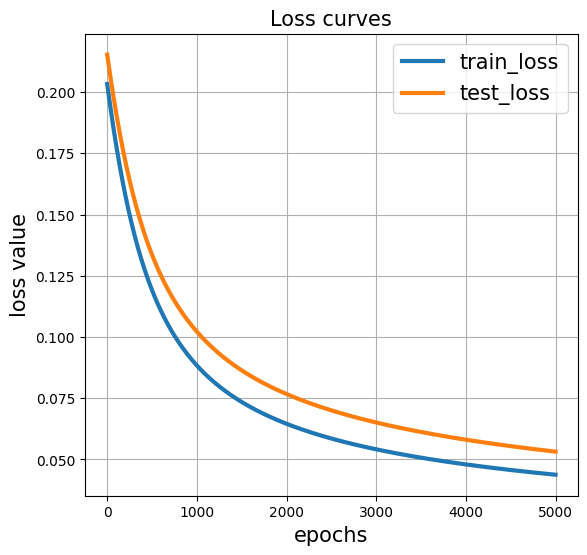

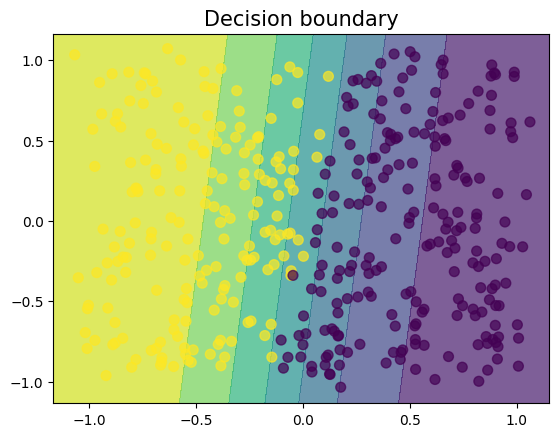

In [43]:
X, Y = linearData(400)
X_train, Y_train = X[:200, :], Y[:200]
X_val, Y_val = X[200:, :], Y[200:]

mlp = MLP(3, [2, 1, 1], ['linear', 'sigmoid'], 'xavier')

# Training parameters
num_epochs = 5000
learning_rate = 0.01

final_train_loss, final_train_acc, train_loss, val_loss = train_mlp(mlp, X_train, Y_train, X_val, Y_val, num_epochs, learning_rate, 'L2')

log = {'train_loss': train_loss, 'test_loss': val_loss, 'epochs': num_epochs}
plot_loss(log)
plot_decision_boundary(X, Y, lambda X: predict_mlp(mlp, X))

# Deliverable 3: XOR problem
## Architecture Used
- Layers - [2, 20, 20, 1]

I chose this because I find that having fewer than 20 neurons and 2 hidden layers might not consistently produce the decision boundary.

- Activations - ['relu', 'relu', 'sigmoid']

I used ReLU to capture the non-linearity of the data and sigmoid to convert the result to binary classification result.

- Cost Function - Cross Entropy

Because this function can better represent the error in classification problems.

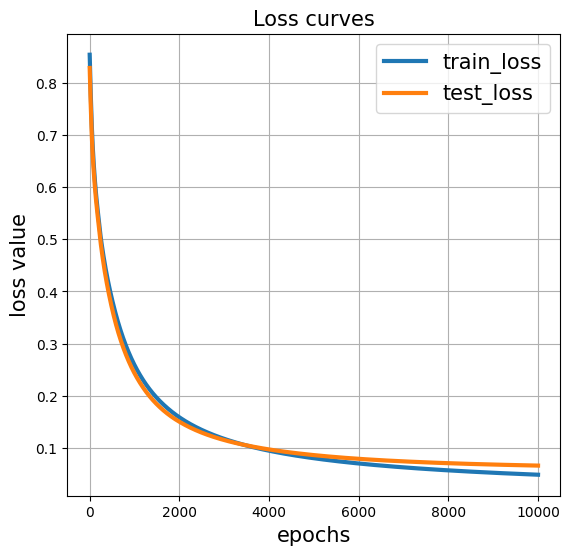

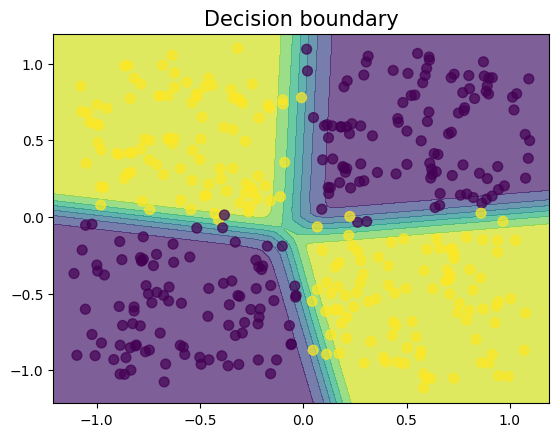

In [34]:
X, Y = XORData()
X_train, Y_train = X[:200], Y[:200]
X_val, Y_val = X[200:], Y[200:]

num_layers = 4
num_width = [2, 20, 20, 1]
opt_act = ['relu', 'relu', 'sigmoid']  # relu for hidden layer, sigmoid for output to generate enough non-linearity
opt_init = 'he'
mlp = MLP(num_layers, num_width, opt_act, opt_init)

num_epochs = 10000
learning_rate = 0.05
loss_type = 'cross_entropy'
final_train_loss, final_train_acc, train_loss, val_loss = train_mlp(mlp, X_train, Y_train, X_val, Y_val, num_epochs, learning_rate, loss_type)

log = {'train_loss': train_loss, 'test_loss': val_loss, 'epochs': num_epochs}
plot_loss(log)
plot_decision_boundary(X, Y, lambda X: predict_mlp(mlp, X))

# Deliverable 4: Differences in cost function

## Architecture
- Layers - [2, 20, 20, 1]

I chose this because I find that having fewer than 20 neurons and 2 hidden layers might not consistently produce the decision boundary.

- Activations for Classifier - ['relu', 'relu', 'sigmoid']

- Activations for Regression - ['relu', 'relu', 'linear']

I used ReLU to capture the non-linearity of the data and sigmoid to convert the result to binary classification result. For regression, since the data should be a linear value, I chose linear activation for the last layer.

- Cost Function for Classifier - Cross Entropy

- Cost Function for Regression - L2

Because this function can better represent the error in classification problems. Similarly, since we are not calculating the error in terms of classes, using L2 loss will be more appropriate.

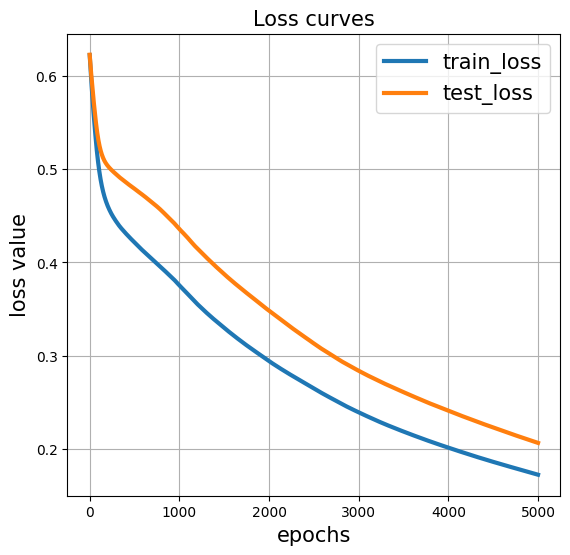

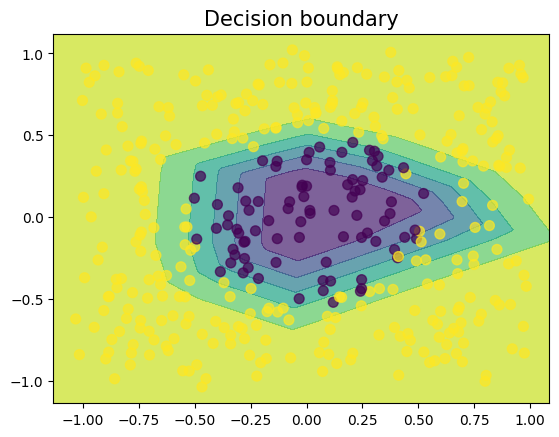

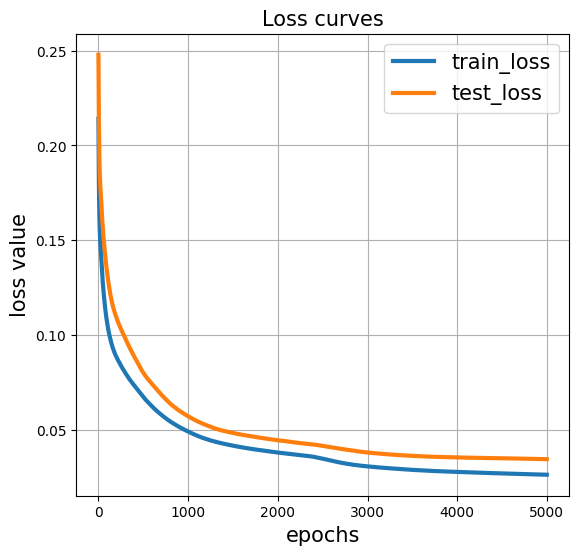

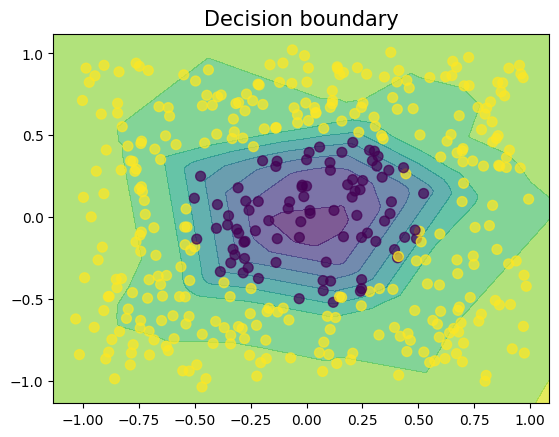

In [51]:
X, Y = circleData()
X_train, Y_train = X[:200], Y[:200]
X_val, Y_val = X[200:], Y[200:]

# classifier
num_layers = 4
num_width = [2, 10, 10, 1]
opt_act = ['relu', 'relu', 'sigmoid']
opt_init = 'xavier'
mlp = MLP(num_layers, num_width, opt_act, opt_init)

num_epochs = 5000
learning_rate = 0.03
loss_type = 'cross_entropy'
final_train_loss, final_train_acc, train_loss, val_loss = train_mlp(mlp, X_train, Y_train, X_val, Y_val, num_epochs, learning_rate, loss_type)

log = {'train_loss': train_loss, 'test_loss': val_loss, 'epochs': num_epochs}
plot_loss(log)
plot_decision_boundary(X, Y, lambda X: predict_mlp(mlp, X))

# regression using the same model
opt_act = ['relu', 'relu', 'linear']
opt_init = 'xavier'
mlp = MLP(num_layers, num_width, opt_act, opt_init)

loss_type = 'L2'
final_train_loss, final_train_acc, train_loss, val_loss = train_mlp(mlp, X_train, Y_train, X_val, Y_val, num_epochs, learning_rate, loss_type)

log = {'train_loss': train_loss, 'test_loss': val_loss, 'epochs': num_epochs}
plot_loss(log)
plot_decision_boundary(X, Y, lambda X: predict_mlp(mlp, X))


# Deliverable 5: Differences in optimizers
For this problem, I was having trouble producing consistent results after trying extensively. Normal GD and GD with momentum sometimes have trouble converging. The Adam optimizer produced the best result in general, but I cannot get the validation loss below 0.2 despite my best effort.

## Architectures
- Layers - [2, 80, 80, 1]

After trying many different configurations by adding more layers with different width, I find this configuration to produce the most consistent results.

- Activations - ['relu', 'relu', 'sigmoid']

I used ReLU to capture non-linearities in the data and used sigmoid to produce binary classification results.

- Cost Function - cross_entropy

Since it is a classification problem, using cross entropy to take different classes into account should be most appropriate.

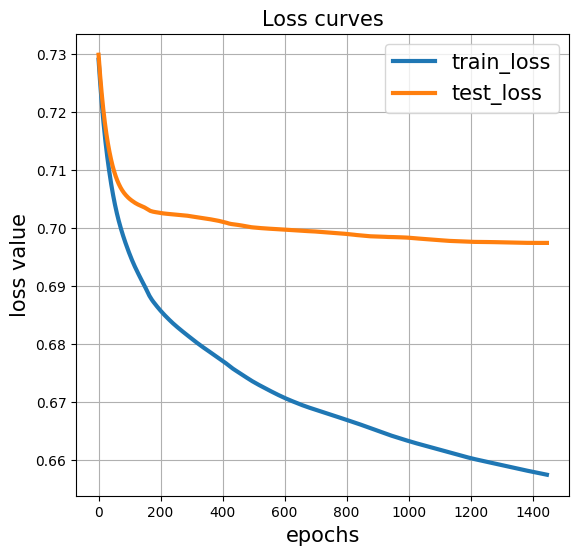

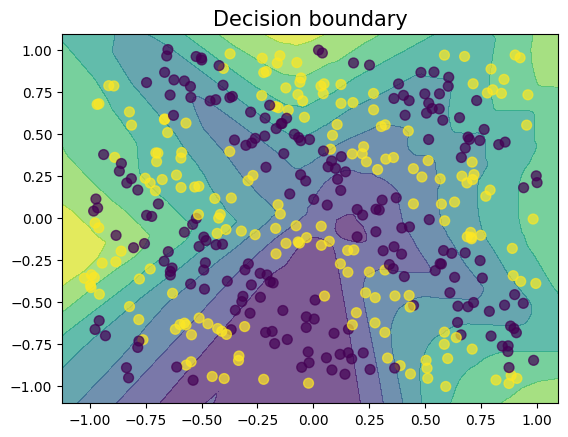

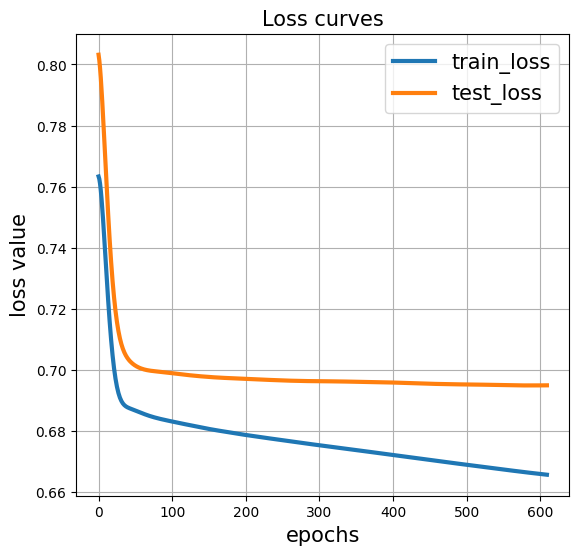

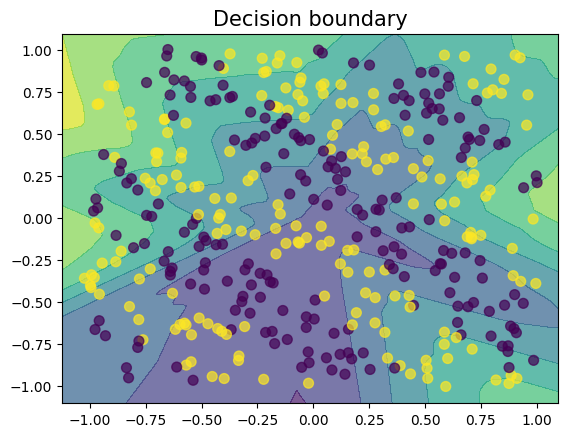

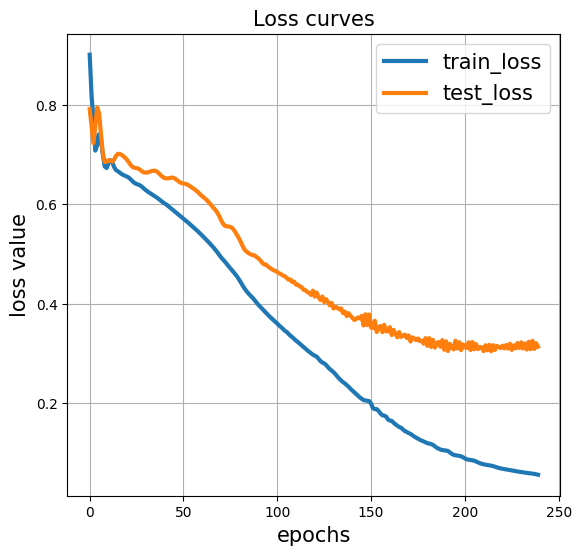

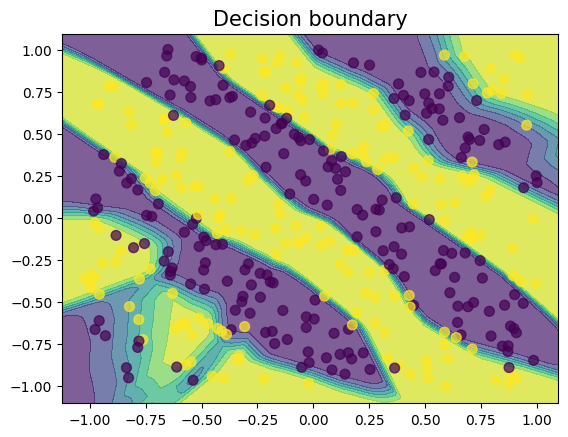

In [41]:
X, Y = sinusoidData()
X_train, Y_train = X[:200], Y[:200]
X_val, Y_val = X[200:], Y[200:]
# X_train, Y_train, X_val, Y_val = sample_data('sinusoid', 200, 200, 0)

num_layers = 4
num_width = [2, 80, 80, 1]
opt_act = ['relu', 'relu', 'sigmoid']
opt_init = 'he'

epochs = 10000
lr = 0.01
loss_type = 'cross_entropy'

# normal GD
mlp_vanilla = MLP(num_layers, num_width, opt_act, opt_init)
final_train_loss, final_train_acc, train_loss, val_loss = train_mlp(mlp_vanilla, X_train, Y_train, X_val, Y_val, epochs, lr, loss_type)
log = {'train_loss': train_loss, 'test_loss': val_loss, 'epochs': epochs}
plot_loss(log)
plot_decision_boundary(X, Y, lambda X: predict_mlp(mlp_vanilla, X))

# GD with momentum
mlp_momentum = MLP(num_layers, num_width, opt_act, opt_init, update_method='momentum')
final_train_loss, final_train_acc, train_loss, val_loss = train_mlp(mlp_momentum, X_train, Y_train, X_val, Y_val, epochs, lr, loss_type)
log = {'train_loss': train_loss, 'test_loss': val_loss, 'epochs': epochs}
plot_loss(log)
plot_decision_boundary(X, Y, lambda X: predict_mlp(mlp_momentum, X))

# Adam
mlp_adam = MLP(num_layers, num_width, opt_act, opt_init, update_method='adam')
final_train_loss, final_train_acc, train_loss, val_loss = train_mlp(mlp_adam, X_train, Y_train, X_val, Y_val, epochs, lr, loss_type)
log = {'train_loss': train_loss, 'test_loss': val_loss, 'epochs': epochs}
plot_loss(log)
plot_decision_boundary(X, Y, lambda X: predict_mlp(mlp_adam, X))

# Deliverable 6: Swiss roll
## Architecture
- Layers - [2, 80, 80, 80, 80, 1]

After experimenting extensively, this would produce the best results. Having fewer layers or number of neurons likely couldn't capture the complexity of the dataset.

- Activations - ['relu', 'relu', 'relu', 'relu', 'sigmoid']

I used ReLU to capture non-linearities and sigmoid to produce binary classification result.

- Loss Function - Cross Entropy

Since it is a classification problem, using cross entropy to take different classes into account should be most appropriate.

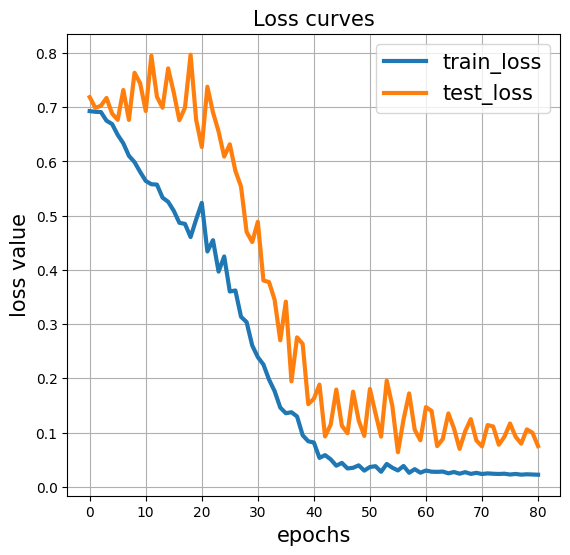

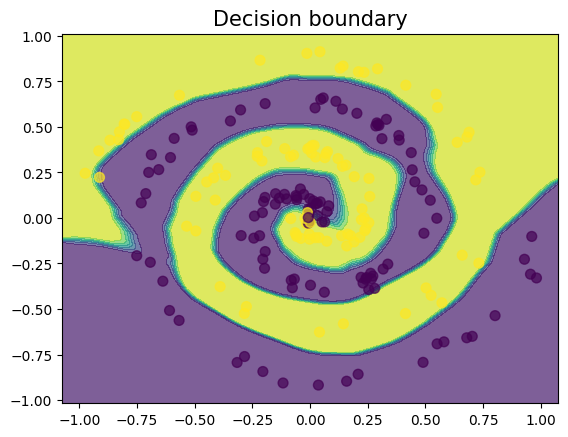

In [37]:
X_train, Y_train, X_val, Y_val = sample_data('swiss-roll', 200, 200, 0)

num_layers = 6
num_width = [2, 80, 80, 80, 80, 1]
opt_act = ['relu', 'relu', 'relu', 'relu', 'sigmoid']
opt_init = 'xavier'
epochs = 300
lr = 0.02
loss_type = 'cross_entropy'

mlp = MLP(num_layers, num_width, opt_act, opt_init, update_method='adam')
final_train_loss, final_train_acc, train_loss, val_loss = train_mlp(mlp, X_train, Y_train, X_val, Y_val, epochs, lr, loss_type)
log = {'train_loss': train_loss, 'test_loss': val_loss, 'epochs': num_epochs}
plot_loss(log)
plot_decision_boundary(X_val, Y_val, lambda X: predict_mlp(mlp, X))

# Deliverable 7: Non-linear embeddings
## Circles
To introduce non-linear embeddings for the circle dataset, I calculated the sequare radius for the circles as a feature. This is because circles might be best characterized by radii. I was able to obtain slightly lower validation loss after this.

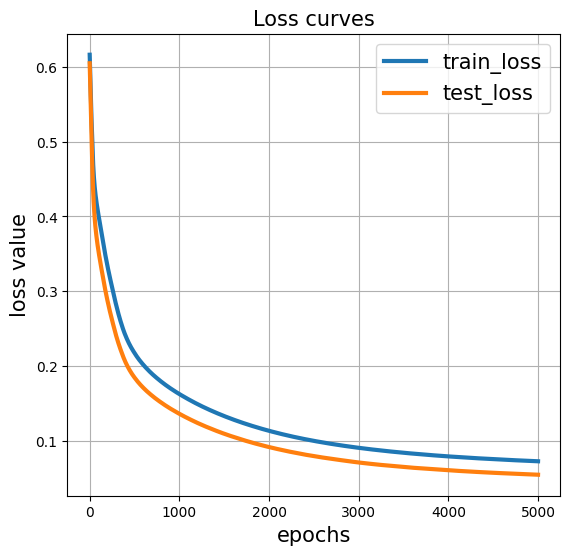

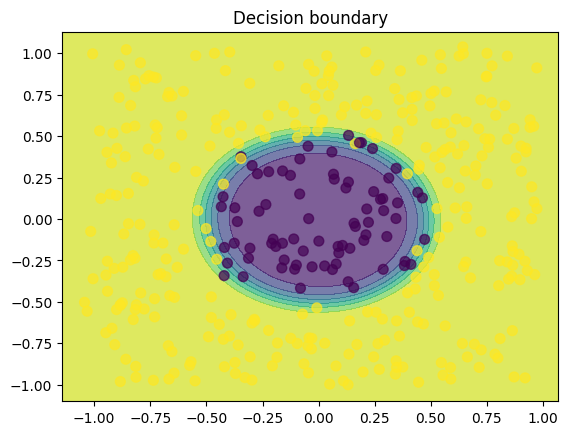

In [38]:
def augment_features_circle(X):
    new_feature = X[:, 0]**2 + X[:, 1]**2
    new_feature = new_feature.reshape(-1, 1)
    X_augmented = np.hstack((X, new_feature))
    return X_augmented

def plot_decision_boundary_aug(X, y, pred_fn, feature_transform_fn, boundary_level=None):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    grid = np.c_[xx.ravel(), yy.ravel()]
    transformed_grid = feature_transform_fn(grid)

    Z = pred_fn(transformed_grid)
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.7, levels=boundary_level, cmap='viridis_r')
    plt.scatter(X[:, 0], X[:, 1], c=y.reshape(-1), alpha=0.7, s=50, cmap='viridis_r')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title('Decision boundary')
    plt.show()

     
X, Y = circleData()
X_aug = augment_features_circle(X)

X_train, Y_train = X_aug[:200], Y[:200]
X_val, Y_val = X_aug[200:], Y[200:]

num_layers = 4
num_width = [3, 10, 10, 1]
opt_act = ['relu', 'relu', 'sigmoid']
opt_init = 'xavier'
mlp = MLP(num_layers, num_width, opt_act, opt_init)

num_epochs = 5000
learning_rate = 0.03
loss_type = 'cross_entropy'
final_train_loss, final_train_acc, train_loss, val_loss = train_mlp(mlp, X_train, Y_train, X_val, Y_val, num_epochs, learning_rate, loss_type)

log = {'train_loss': train_loss, 'test_loss': val_loss, 'epochs': num_epochs}
plot_loss(log)
plot_decision_boundary_aug(X, Y, lambda X: predict_mlp(mlp, X), augment_features_circle)

## XOR
For the XOR dataset, I calculated x * y because this should extract the linearity from the dataset relatively well. I was able to lower the number of neurons used while still maintaining a lower validation loss consistently.

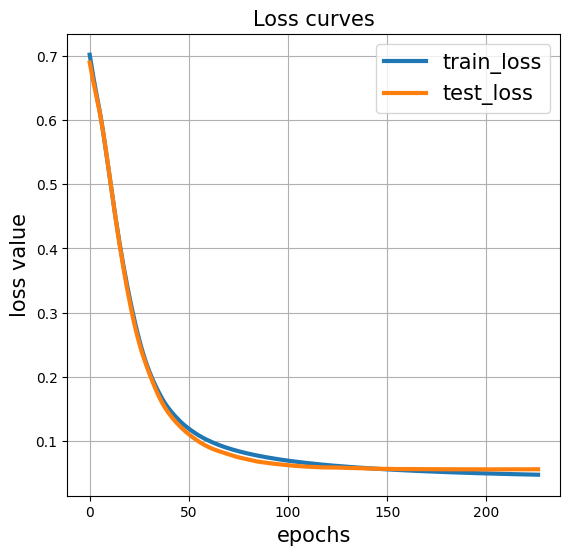

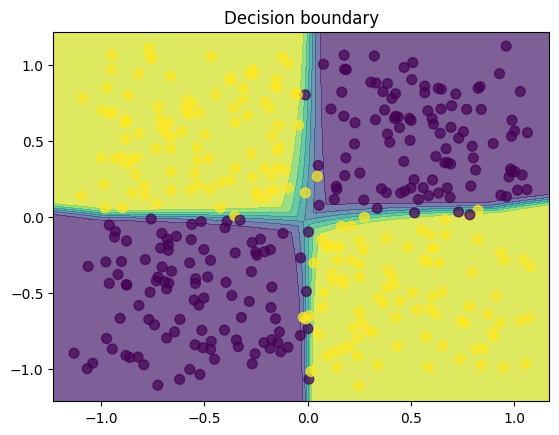

In [39]:
def augment_features_xor(X):
    product_feature = X[:, 0] * X[:, 1]
    product_feature = product_feature.reshape(-1, 1)
    X_augmented = np.hstack((X, product_feature))
    return X_augmented


X, Y = XORData()
X_aug = augment_features_xor(X)
X_train, Y_train = X_aug[:200], Y[:200]
X_val, Y_val = X_aug[200:], Y[200:]

num_layers = 3 
num_width = [3, 4, 1]
opt_act = ['relu', 'sigmoid']  # relu for hidden layer, sigmoid for output to generate enough non-linearity
opt_init = 'xavier'
mlp = MLP(num_layers, num_width, opt_act, opt_init, update_method='adam')

num_epochs = 500
learning_rate = 0.05
loss_type = 'cross_entropy'
final_train_loss, final_train_acc, train_loss, val_loss = train_mlp(mlp, X_train, Y_train, X_val, Y_val, num_epochs, learning_rate, loss_type)

log = {'train_loss': train_loss, 'test_loss': val_loss, 'epochs': num_epochs}
plot_loss(log)
plot_decision_boundary_aug(X, Y, lambda X: predict_mlp(mlp, X), augment_features_xor)

## Swiss roll
I experimented with this dataset extensively with different features. By extracting the polar coordinates of the dataset, I was able to reduce the number of neurons in the hidden layers from 80 to 16. I think this is because the most straight forward way to represent this dataset is by encoding the points into radius and theta.

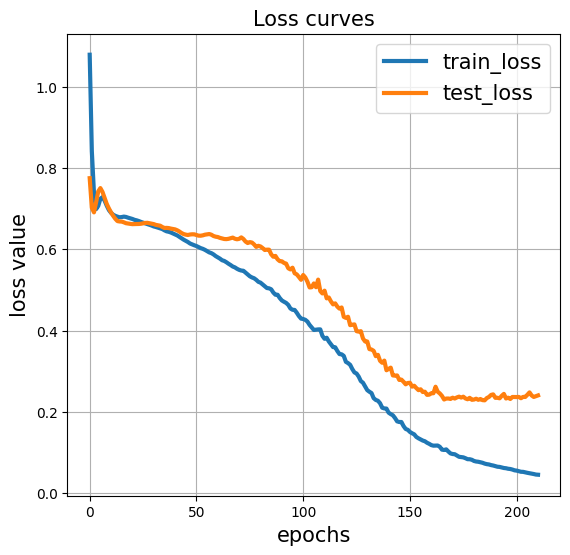

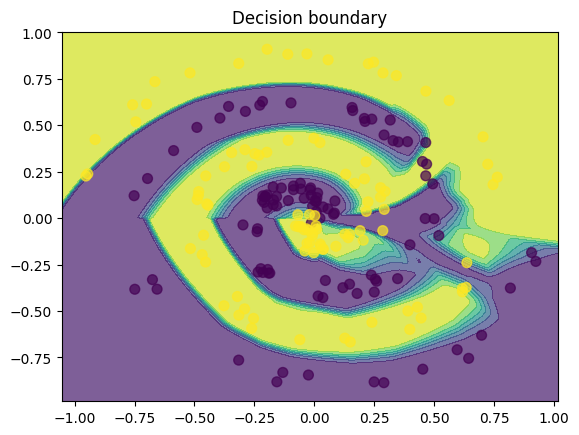

In [40]:
def augment_features_swiss_roll(X):
    r = np.sqrt(X[:, 0]**2 + X[:, 1]**2)
    theta = np.arctan2(X[:, 1], X[:, 0])
    # r_norm = (r - r.min()) / (r.max() - r.min())  # Normalizing radius
    # sin_theta = np.sin(theta)
    # cos_theta = np.cos(theta)
    # r_squared = r**2
    # r_cubed = r**3
    # sin_2theta = np.sin(2 * theta)
    # cos_2theta = np.cos(2 * theta)
    X_augmented = np.hstack((X, r.reshape(-1, 1), theta.reshape(-1, 1)))
    return X_augmented

X, Y = swissrollData(n_sample=200)
X_aug = augment_features_swiss_roll(X)
X_train, Y_train = X_aug, Y
X1, Y1 = swissrollData(n_sample=200)
X1_aug = augment_features_swiss_roll(X1)
X_val, Y_val = X1_aug, Y1

num_layers = 6
num_width = [4, 16, 16, 16, 16, 1]
opt_act = ['relu', 'relu', 'relu', 'relu', 'sigmoid']
opt_init = 'he'
epochs = 300
lr = 0.01
loss_type = 'cross_entropy'

mlp = MLP(num_layers, num_width, opt_act, opt_init, update_method='adam')
final_train_loss, final_train_acc, train_loss, val_loss = train_mlp(mlp, X_train, Y_train, X_val, Y_val, epochs, lr, loss_type)
log = {'train_loss': train_loss, 'test_loss': val_loss, 'epochs': num_epochs}
plot_loss(log)
plot_decision_boundary_aug(X1, Y1, lambda X1: predict_mlp(mlp, X1), augment_features_swiss_roll)